## 1. Class와 Object

**List Class와 Object**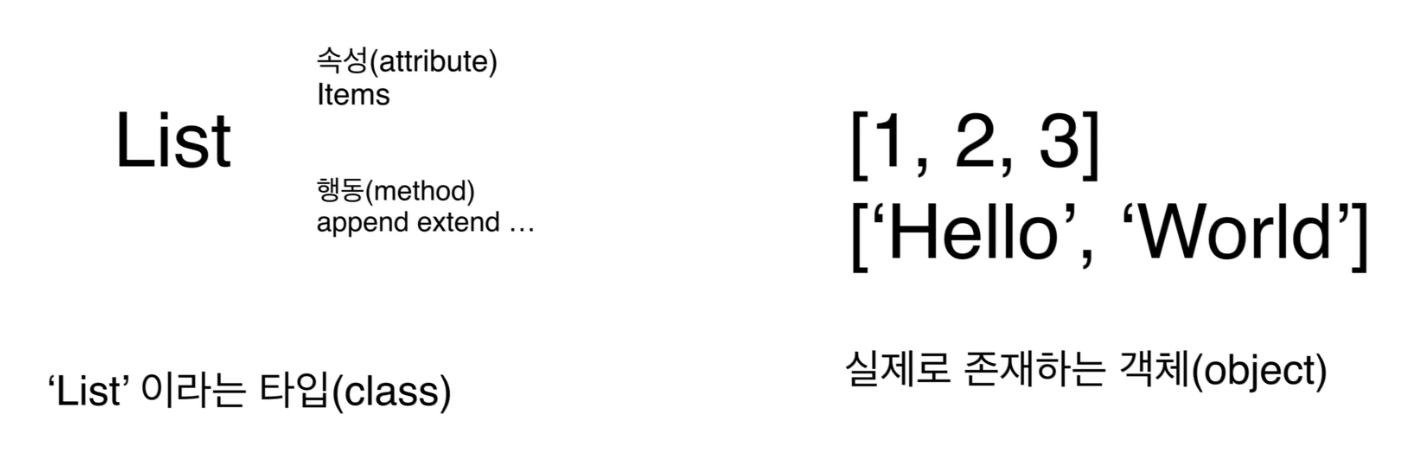

#### **class란?**
 + 실세계의 것을 모델링하여 (1)**속성(attribute, variable)**와 (2)**동작(method)**를 갖는 "데이터 타입"
 + python에서의 string, int, list, dict.. 모두가 다 클래스로 존재.
 + 예를들어 학생이라는 클래스를 만든다면, 학생을 나타내는 (1)**속성**과 학생이 행하는 (2)**행동**을 함께 정의 할 수 있음
 + 따라서, 다루고자 하는 데이터(변수) 와 데이터를 다루는 연산(함수)를 하나로 캡슐화(encapsulation)하여 클래스로 표현
 + 모델링에서 중요시 하는 속성에 따라 클래스의 속성과 행동이 각각 달라짐

In [51]:
a = dict()
type(a)        #dict가 바로 class

dict

In [52]:
a.__class__    #이렇게도 확인가능하다.

dict

#### **object 란?**
 - <font color ='FF0000'>클래스로 생성되어 구체화된 객체(인스턴스).</font> 파이썬의 모든 것(int, str, list..etc)은 객체(인스턴스)
 - *실제로 class가 인스턴스화 되어 메모리에 상주하는 상태를 의미*
 

In [ ]:
a = 1          #이것이 literal 방식이라면
b = int(1)     #이것이 instance 방식이고, 이것이 바로 객체지향방식이다. 

---
(아래는 몰라도 됨)

In [53]:
# 파이썬의 흥미로운 부분은 class의 class가 존재하고 바로 그 class는 type이다.
a.__class__.__class__          

type

In [55]:
# type이라는 class의 instance가 str, list, dict.. 등등 인것
print(isinstance(dict, type))
print(isinstance(list, type))
print(isinstance(str, type))

True
True
True


#### **class 선언하기**
  - 객체를 생성하기 위해선 객체의 모체가 되는 class를 미리 선언해야 함 
  - class이름은 대문자로 시작한다. 
   > Q. 그렇담, int, float 모두 class인데 왜 대문자로 시작하지 않는가
 A. int, float을 만들고 나서 PEP8을 만들어서 그렇다

In [6]:
class Person:
    pass

In [8]:
bob = Person()
cathy = Person()

In [9]:
type(bob)     # 현재 파일에서 만든 경우 __main__이 나온다

__main__.Person

---

#### __init__(self)
 + 생성자라고 함, **클래스 인스턴스가 생성될 때 호출됨**
 + self인자는 항상 첫번째에 오며 instance 자기 자신을 가리킴
 + 이름이 꼭 self일 필요는 없지만, 관례적으로 self로 사용
 

+ 생성자에서는 해당 클래스가 다루는 **데이터를 정의**
   - 이 데이터를 멤버 변수(member **variable**) 또는 속성(**attribute**)라고 함
   - **variable/attribute는 생성 이후 수정 가능하다.** --> 사실 이것이 oop를 사용하는 큰 이유 중 하나

In [1]:
class Person:
    def __init__(self):
        print(self, 'is generated' )

p1 = Person()    #0x10d2581d0: 메모리 주소
p2 = Person()    #p1과 메모리 주소가 다른 것을 확인할 수 있다. 
print("instance 생성과 동시에 위와 같은 message가 출력되었다.")

<__main__.Person object at 0x10ce8cc90> is generated
<__main__.Person object at 0x10ce8ccd0> is generated
instance 생성과 동시에 위와 같은 message가 출력되었다.


In [3]:
class Person:
    def __init__(self):
        print(self, 'is generated' )
        self.name = 'Kate'          
        self.age = 10

p1 = Person()    
print(p1.name, p1.age)

p1.name = 'aaron'
p1.age = 20
print(p1.name, p1.age)

<__main__.Person object at 0x10cd58850> is generated
Kate 10
aaron 20


In [17]:
## attribute, variable을 동적으로 수정하고 싶다. 
class Person:
    def __init__(self, name, age=10):
        print(self, 'is generated' )
        self.name = name            #self.name: instance variable/attribute
        self.age = age

p1 = Person('Bob', 15)  
p2 = Person('Aaron')  
print(p1.name, p1.age)
print(p2.name, p2.age)

p1.__dict__                        #instance attribute는 dict로 확인가능

<__main__.Person object at 0x108973b50> is generated
<__main__.Person object at 0x108973c90> is generated
Bob 15
Aaron 10


{'name': 'Bob', 'age': 15}

#### cf. class attribute
* class 차원의 attribute(값)이다.
* `instance.colour`, `class.colour`: 두 방법 모두로 접근 가능하다.

In [18]:
class Door:
    colour = 'brown'     #class attribute

    def __init__(self, number, status):
        self.number = number
        self.status = status
        
door1 = Door(1, 'closed')
door2 = Door(2, 'closed')

In [19]:
door1.colour

'brown'

In [20]:
door2.colour

'brown'

In [21]:
Door.colour

'brown'

In [25]:
Door.colour = 'white'

In [26]:
print(door1.colour)
print(door2.colour)
print(Door.colour)

white
white
white


####  <font color="FF0000">`instance.colour`이것은 어떻게 가능한 것인가.</font>
 
1. instance의 내부 dictionary를 확인하고(`door1.__dict__['colour']`) 없으면,
2.  class dictionary를 확인한다.( `door1.__class__.__dict__['colour']`)

<font color="0000FF">**따라서 class level의 무엇을 바꾸면,** instance에는 없는 attribute/method(또는 class에만 있는 attribute/method)도 **동일하게 변경되는 것처럼 보인다.**</font> 사실은 진짜 class level의 값을 가져와서 print 한 것이다.

* **Instance attribute/Instance method**(instance level)
* **Class attribute/@Classmethod(cf. @staticmethod, @property**)(class level)

In [27]:
Door.__dict__            #Class

mappingproxy({'__module__': '__main__',
              'colour': 'white',
              '__init__': <function __main__.Door.__init__(self, number, status)>,
              '__dict__': <attribute '__dict__' of 'Door' objects>,
              '__weakref__': <attribute '__weakref__' of 'Door' objects>,
              '__doc__': None})

In [28]:
door1.__dict__           #instance: 여기에는 colour가 없다. 

{'number': 1, 'status': 'closed'}

In [30]:
door1.colour is Door.colour

True

cf. `instance.colour`의 dot syntax는 사실 내부적으로 `instance.__getattribute__("colour")`와 동일하다.

---

#### **self**
 - **파이썬의 method는 항상 첫번째 인자로 self를 전달.** 따라서 method의 첫번째 인자로 아무것도 안 적어주면 실행시에 에러가 난다.
 - self는 현재 해당 메쏘드가 호출되는 **객체 자신**을 가리킴
 - C++/C#, Java의 this에 해당
 - 역시, 이름이 self일 필요는 없으나, 위치는 항상 맨 처음의 parameter이며 관례적으로 self로 사용

- class A에 해당하는 객체 "yyy"에 대하여, class 내의 method를 실행하려고 할때,
  - 옛날 방법)**A.moon(yyy,5)** => class A의 moon method에 인자 yyy와 5를 넣었다.
  - 지금방법)**yyy.moon(5)** => class A에 속하는 객체 yyy는 class 내에 정의된 method moon을 사용할 수 있고, 인자 5를 넣어준다/self는 더이상 안 넣음

In [21]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def sleep(self):
        print(self.name, '은 잠을 잡니다.')
    
    def tmp():
        print('it is okay')

p1 = Person('Bob', 15)  
p2 = Person('Aaron', 20)  

p1.sleep()
p2.sleep()

p1.tmp()     #self가 전달되지 않았다는 error

Bob 은 잠을 잡니다.
Aaron 은 잠을 잡니다.


TypeError: tmp() takes 0 positional arguments but 1 was given

#### **mehtod 정의**
 + 멤버함수라고도 하며, 해당 클래스의 object에서만 호출가능
 + 메쏘드는 객체 레벨에서 호출되며, 해당 객체의 속성에 대한 연산을 행함
 + `{obj}.{method}()` 형태로 호출됨
 
 
> cf. function과는 조금 다른 개념. 위의 예시에서 `sleep()`은 Person이라는 class의 method이고 `p1.sleep()`형태로 호출되지만, sleep()을 function으로 정의한다면 `def sleep(Person_object):...`이런식으로 정의해야함. 이때는 `sleep(p1)`이런식으로 사용가능하겠지./**굳이 사용하자면 `Person.sleep(p1)`이렇게는 가능하다!**

> 즉, `type(Person.sleep)` 은 function이지만, `type(p1.sleep)` 은 method이다. 

In [57]:
# 기능 1: 숫자를 하나 증가
# 기능 2: 숫자를 0으로 초기화
class Counter:
    def __init__(self):
        self.num = 0
        
    def increment(self):
        self.num += 1
        
    def reset(self):
        self.num = 0
    
    def print_current_value(self):
        print('현재값은:', self.num)
        
c1 = Counter()
c1.print_current_value()

c1.increment()
c1.increment()
c1.print_current_value()

c1.reset()
c1.print_current_value()

현재값은: 0
현재값은: 2
현재값은: 0


#### **method type**

 - (1) **instance method** - 객체로 호출. *지금까지 본 것은 instance method*
   - 메쏘드는 객체 레벨로 호출 되기 때문에, 해당 메쏘드를 호출한 객체에만 영향을 미침
   - `{obj}.{method}()` 형태로 호출됨


In [24]:
class Math():
    def add(self, a, b):
        return a + b
    
    def multiply(self, a, b):
        return a*b
    
m = Math()
m.add(10, 20)
m.multiply(10, 20)

200

 - (2) **class method(static method)**    - class로 호출
   - 클래스 메쏘드의 경우, 클래스 레벨로 호출되기 때문에, 클래스 멤버 변수만 변경 가능
   - 또한 클래스 레벨로 호출되기 때문에 method 첫번째인자가 self가 아니다.
   - `{Class_name}.{method}()` 형태로 호출됨(사실 이 방법은 instance, class 방법 모두 사용 가능)
   
   > - **class method**: class 내에 instance method와 똑같은 방식으로 만든다. 단, 첫번째 인자는 `cls`(class) 사용/instance method에서 self 썼듯이. 그리고 위에 데코레이터를 달아준다 `@classmethod`. The class method can be called on the class, **but this effects both the class and the instances.**(아래 예시 참조)
   - **static method**: class 내에 instance method와 똑같은 방식으로 만든다. **기본적인 인자가 필요 없다**/즉 cls, self 다 필요없음. 그리고 위에 데코레이터를 달아준다 `@staticmethod`. *아래 예시(`Math()`)처럼 내부적으로 유지할 데이터, 즉 속성이 없는 경우 static method를 사용한다.* 

In [45]:
##class method
class A:
    a = 3   #class attribute
    b = 4
        
    @classmethod
    def sun(cls):          #class method
        cls.b = "tmp"      #class attribute 수정 --> instance까지 영향
        return 'sun'
    
    def moon(self,t):
        self.t = t  

In [46]:
A.sun()  #class method와 같이 쓸 수 있다.

'sun'

In [47]:
a = A()          #instance method와 같이 쓸 수 있다
a.sun()

'sun'

In [48]:
A.b              #sun() 실행이후 class attribute 바뀜

'tmp'

In [49]:
a.b              #sun() 실행이후 class attribute 바뀜

'tmp'

In [41]:
##static method
class A:
    a = 3 
    b = 4
    
    @staticmethod
    def star():
        return 'star'

In [42]:
xxx = A()

In [43]:
xxx.star()        #instance method와 같이 쓸 수 있고

'star'

In [45]:
A.star()           #class method와 같이 쓸 수 있다.

'star'

In [26]:
class Math():
    #k = 1     k: class variable(attribute)
    #같은 이름의 instance attribute가 있다면 instance attribute가 class attribute 보다 더 높은 우선순위를 가진다. 
    @staticmethod
    def add(a, b):
        return a + b
    
    @staticmethod
    def multiply(a, b):
        return a*b
    

Math.add(10, 20)
Math.multiply(10, 20)

200

---

#### **special method**
 - __로 시작 __로 끝나는 특수 함수
 - 해당 메쏘드들을 구현하면, 커스텀 객체에 여러가지 파이썬 내장 함수나 연산자를 적용 가능 --> **파이썬스러운 코드를 쓸 수 있다.**
 - 오버라이딩 가능한 함수 목록은 아래 링크에서 참조 
   - https://docs.python.org/3/reference/datamodel.html
   - e.g. `__str__`(print함수),`__add__`(+), `__sub__`(-), `__mul__`(* ),`__len__`(len 함수), `__getitem__`(인덱싱 기능)

##### 잠시 repr vs. print 비교해보자
일반적으로, repr과 str을 동일하게 만들어 놓는다.

In [5]:
class A:
    def __repr__(self): #나를 대표해 주는 아이
        return '근영'
    def __str__(self):
        return '근영2'

In [6]:
a = A()

In [7]:
a              # 그냥 instance 치면, __repr__ return

근영

In [8]:
print(a)       # print는 __str__을 return

근영2


In [9]:
dir(a)    #정의하지 않은 method도 있다!

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

> #### Point
* 2차원 좌표평면의 각 점(x,y)
* 연산
    * 두점의 덧셈, 뺄셈: (1,2) + (3,4) = (4, 6)
    * 한 점과 숫자의 곱셈: (1,2) * 3 = (3,6)
    * 그 점의 길이: (0,0)부터의 거리
    * x,y 값 가져오기
* 출력하기

In [39]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

p1 = Point(3,4)
p2 = Point(2,7)

print(p1)
print(p2)
print("--> Object 메모리 주소가 return 된다. \n =======================================")


class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return'({}, {})'.format(self.x, self.y)

p1 = Point(3,4)
p2 = Point(2,7)

print(p1)
print(p2)
print("--> '__str__함수'를 overrideing하면 print 기능을 사용할 수 있다.")

--> Object 메모리 주소가 return 된다. 
(3, 4)
(2, 7)
--> '__str__함수'를 overrideing하면 print 기능을 사용할 수 있다.


In [50]:
#주석처리한 방법 대신 기존의 파이썬 연산자 및 내장 함수 사용
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return'({}, {})'.format(self.x, self.y)
    #def print_pt(self)
    #    print('({}, {})'.format(self.x, self.y))
    
    def __add__(self, pt):
        new_x = self.x + pt.x
        new_y = self.y + pt.y
        return Point(new_x, new_y)
    #def add(self, pt):
    #    new_x = self.x + pt.x
    #    new_y = self.y + pt.y
    #    return Point(new_x, new_y)
    
    def __sub__(self, pt):
        new_x = self.x - pt.x
        new_y = self.y - pt.y
        return Point(new_x, new_y)
    
    def __mul__(self, factor):
        return(self.x*factor, self.y*factor)
    #def multiply(self, factor):
    #    return(self.x*factor, self.y*factor)
    
    def __len__(self):
        return(self.x**2 + self.y**2)
    #def length(self):
    #    return(self.x**2 + self.y**2)
    
    
    def __getitem__(self, index):
        if index==0:
            return self.x
        elif index ==1:
            return self.y
        else:
            return -1    
    #def get_x(self):
    #    return self.x

    #def get_y(self):
    #    return self.y
        

p1 = Point(3,4)
p2 = Point(2,7)

print(p1);print(p2)  #p1.print_pt();p2.print_pt()
p3 = p1 + p2         #p3 = p1.add(p2)
p4 = p1 - p2 

print(p3);print(p4)

p5 = p1*3 #p5 = p1.multiply(3)
print(p5)

len(p1)  #print(p1.length())

print(p1[0]); print(p1[1]) #print(p1.get_x());print(p1.get_y())

(3, 4)
(2, 7)
(5, 11)
(1, -3)
(9, 12)
3
4


---

In [51]:
##정리해보자
a = []

In [52]:
dir(a)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [53]:
#__add__의 의미는 a + b가 가능하다는 뜻, __str__는 print가 가능하다는 뜻
b = [3]

print(a+b)

[3]


---

#### 연습문제)
 - 복소수 클래스를 정의 해봅시다.
 - 덧셈, 뺄셈, 곱셈 연산자 지원
 - 길이 (복소수의 크기) 지원 
 - 복소수 출력 '1 + 4j'와 같이 표현
 - 비교 연산 ==, != 지원
 - `>=`, `<=` , `<`, `>` 연산 지원
 - 절대값 지원


In [ ]:
import math
class Complex:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __add__(self, cn):
        return(Complex(self.a + cn.a, self.b + cn.b))
    
    def __sub__(self, cn):
        return(Complex(self.a - cn.a, self.b - cn.b))

    def __mul__(self, x):
        if type(x) == int:
            return Complex(self.a*x, self.b*x)
        else type(x) == Complex:
            return Complex(self.a*x.a - self.b*x.b, self.a*x.b + self.b*x.a)
    
    def __str__(self):
        if self.b < 0:
            return '{} - {}j'.format(self.a,abs(self.b))
        else:
            return '{} + {}j'.format(self.a,self.b)
    
    def __eq__(self, cn):
        return self.a == cn.a and self.b ==cn.b

    def __ne__(self, cn):
        return not (self.a == cn.a and self.b ==cn.b)
    
    def __abs__(sef):
        return math.sqrt(self.a**2 + self.b**2)
    
    def __len__(self):
        return self.a**2 + self.b**2 #integer return만 가능하다. 
        
    
a = Complex(1,2)
b = Complex(3,4)
c = Complex(1,2)
print(a)
print(a + b)
print(a - b)
print(a*3)
print(a*b)
print(a==c)
print(a!=c)
print(abs(a))

#### property
* class의 또 다른 method/cf. class method, static method, instance method
* property method is not callable().
* 사용하는 방법:  make instance(e.g. `a = A()`), and then `a.property_method`(--> without parentheses)

In [1]:
class A:
    @property
    def sun(self):
        return '문근영'

In [2]:
a = A()

In [3]:
a.sun()  # 기존의 메쏘드 처럼 부르면 실행이 안된다.

TypeError: 'str' object is not callable

In [4]:
a.sun  # property가 붙어있으면, 함수(또는 메쏘드)형식으로 쓰지 않고(즉 괄호를 붙이지 않고) 사용한다

'문근영'

---

## 2. Class 상속

 #### **Class Inheritance (상속)**
  - 기존에 정의해둔 클래스의 기능을 그대로 물려받을 수 있다. 부모 class가 가진 모든 attribute와 method를 자식 class 모두 사용 가능
  - 기존 클래스에 기능 일부를 추가하거나, 변경하여 새로운 클래스를 정의한다.
  - 코드를 재사용할 수 있게된다.
  - 상속 받고자 하는 대상인 기존 클래스는 (**Parent, Super, Base class**) 라고 부른다.
  - 상속 받는 새로운 클래스는(**Child, Sub, Derived class**) 라고 부른다.
  - 의미적으로 is-a관계를 갖는다
      - Studnet is a person.
      - Employee is a person.

In [28]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def eat(self, food):
        print('{}은 {}을 먹습니다.'.format(self.name, food))
    
    def sleep(self, minute):
        print('{}은 {}분동안 잡니다.'.format(self.name, minute))
    
    def work(self, minute):
        print('{}은 {}분동안 일합니다.'.format(self.name, minute))
    
Bob = Person('Bob', 25)
Bob.eat('BBQ')
Bob.sleep('30')
Bob.work('60')

Bob은 BBQ을 먹습니다.
Bob은 30분동안 잡니다.
Bob은 60분동안 일합니다.


In [30]:
class Student(Person):
    def __init__(self, name, age):
        self.name = name
        self.age = age

class Employee(Person):
    def __init__(self, name, age):
        self.name = name
        self.age = age

#Student라는 Class에는 method가 하나도 정의되어 있지 않지만, Person이라는 class를 상속받았기 때문에 아래와 같은 일들이 가능하다. 
Bob = Student('Bob', 25)
Bob.eat('BBQ')
Bob.sleep('30')
Bob.work('60')

Bob은 BBQ을 먹습니다.
Bob은 30분동안 잡니다.
Bob은 60분동안 일합니다.


#### **method override**
 - 부모 클래스의 method를 재정의(override)
 - 하위 클래스(자식 클래스) 의 인스턴스로 호출시, **재정의된 메소드가 호출됨**. 즉 덮어쓴다.

In [31]:
class Student(Person):
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def work(self, minute):
        print('{}은 {}분동안 공부합니다.'.format(self.name, minute))
        
Bob = Student('Bob', 25)
Bob.work('60')        #'일합니다'가 아닌 '공부합니다'가 출력된다.

Bob은 60분동안 공부합니다.


#### super 
 - 하위클래스(자식 클래스)에서 부모클래스의 method를 호출할 때 사용
 - **(override 되었을때)** 부모에 있는 같은 이름의 다른 메쏘드도 쓰고 싶을 때

In [32]:
class Student(Person):
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def work(self, minute):
        super().work(minute)
        print('{}은 {}분동안 공부합니다.'.format(self.name, minute))
        
Bob = Student('Bob', 25)
Bob.work('60')        #'일합니다'와'공부합니다'가 모두 출력된다. 

Bob은 60분동안 일합니다.
Bob은 60분동안 공부합니다.


* 상속의 종류에는 단일 상속, 다중상속이 있는데 파이썬은 **다중상속**이다. 즉, 부모 여러명에게 상속받을 수 있다
* 다중상속의 문제점 : 다이아몬드 문제 --> MRO 지원/다중상속을 지원하지만 최대한 쓰지 말자.

---

## Tip

* **언더바 이야기**(3가지(FROM 공식문서 2.3) + 4가지 = 7가지 경우의 수가 있다.)
https://docs.python.org/ko/3/reference/lexical_analysis.html#identifiers


1. (언더바 하나)* : from module import * 에 의해 불러지지 않는다
2. (언더바 둘)* (언더바 둘) : 시스템 정의 이름
3. (언더바 둘)* : class 내의 비공개 이름(OOP encapsulation 참조)

In [ ]:
# 4. unpacking 할때, (갈래상) 지금 안쓰는 애들을 _에 저장할 수 있다.
a, b, _, _, c = 1,2,3,4,5

In [ ]:
# 5. identifier로 쓰고 싶은데 이미 keyword로 사용되고 있어, 충돌을 피하고자 할 때
class_

In [15]:
# 6. 마지막에 호출한 애를 저장(단 interactive 환경에서)
a = 3

In [16]:
a

3

In [17]:
_

3

In [18]:
# output 17번째 호출
_17

3